In [395]:
import pandas as pd
import numpy as np

In [396]:
software = 'l2gen'
suit = 'l2gen'
# ACOLITE C2RCC C2RCC-C2X C2RCC-CMX l2gen

exp_dir = '/media/data1/laboratory/measurements/2018/07-2018/'
sat_dir = f'/media/data1/laboratory/results/2018/07-2018/{suit}/'

#exp_dir = '/home/sf/mhi/gorky/laboratory/'
#sat_dir = '/home/sf/mhi/gorky/laboratory/'

#exp_dir = '/home/s-f/Downloads/Sentinel-2/'
#sat_dir = '/home/s-f/Downloads/Sentinel-2/'


sat_ind = 'S2A'
sensor_name = 'MSI'

date_exp = '2018-07-03'
date_sat = '2018-07-03'
exp_name = exp_dir + f'Rrs_{date_exp}.csv'
sat_name = sat_dir + f'{software}_S2_{date_sat}_ac-8.csv'
SRF_name = f'{sat_ind} {sensor_name} SRF.csv'

# настройки построения
plot_data = False

In [397]:
# считываем  инситу радиометрические измерения на станциях
data = pd.read_csv(exp_name, index_col=0, sep='\t')

# отбрасываем станции и длины волн, для которых нет измерений
data = data.dropna(axis=1, how='all') # столбцы
#data = data.dropna(axis=0, how='all')
#data.tail()

In [398]:
# Считываем функцию спектральной чувствительности сенсора
srf = pd.read_csv(SRF_name, index_col=0, sep='\t')
#srf.tail()

In [399]:
# Формируем таблицу с измерениями, приведенными к каналам спутника для 27 станций
# доработка - разные центральные длины волн каналов
if sat_ind == 'S2A':
    wavelength = [443, 492, 560, 665, 704, 740]
elif sat_ind == 'S2B':
    wavelength = [443, 492, 560, 665, 704, 740]
    #wavelength = [442, 492, 559, 665, 704, 739]
    
new_data = pd.DataFrame(columns=wavelength, index=range(1,27), dtype=np.float64)
# Приводим измерения к каналам спутника
for column in data.columns:
    value = [round((data[column] * srf[col]).sum() / srf[col].sum(), 6) for col in srf.columns]
    new_data.loc[int(column)] = value

# Отбрасываем отсутствующие станции, транспонируем таблицу
new_data = new_data.dropna(axis=0, how='all').transpose()
new_data

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
443,0.002756,0.003034,0.001162,0.002465,0.002147,0.002837,0.002634,0.002204,0.002382,0.002313,...,0.002974,0.004914,0.005386,0.004365,0.004977,0.003592,0.004075,0.003158,0.003562,0.001912
492,0.004400,0.005319,0.005353,0.004270,0.003979,0.004574,0.004728,0.004387,0.004280,0.004346,...,0.005812,0.007363,0.007553,0.006633,0.006764,0.005978,0.007039,0.005404,0.005114,0.003474
560,0.007335,0.009747,0.014991,0.007667,0.007587,0.008190,0.008965,0.008586,0.007870,0.007958,...,0.012010,0.012649,0.012395,0.012176,0.011145,0.011425,0.014567,0.010428,0.008563,0.006327
665,0.007872,0.008493,0.008496,0.007751,0.008346,0.009330,0.009334,0.008929,0.008210,0.008608,...,0.010855,0.012169,0.012966,0.012772,0.011851,0.011649,0.012930,0.009948,0.008816,0.007232
704,0.008514,0.011145,0.018981,0.008509,0.008829,0.009794,0.010619,0.010161,0.008782,0.008940,...,0.013701,0.013936,0.014027,0.014813,0.013066,0.014094,0.017352,0.011896,0.009535,0.007339
740,0.005462,0.007161,0.013439,0.004470,0.004969,0.006092,0.005942,0.005642,0.004377,0.004188,...,0.006523,0.008176,0.008662,0.008583,0.008072,0.008581,0.008577,0.006025,0.005324,0.004077


In [400]:
import matplotlib.pyplot as plt

In [401]:
# строятся графики измерений гиперспектральных и на каналах спутника
# доработать вывод в несколько рядов и меньшего размера
if plot_data:
    plt.close("all")
    for col in data.columns:
        plt.figure();
        data[col].plot()
        new_data[int(col)].plot()
        plt.annotate(f'Station #{col}', (0.05,0.85),
             xycoords='axes fraction',fontsize=10,style='italic',color='0.3')
        plt.xlabel('Wavelength, (nm)')
        plt.ylabel('Reflectance, (-)')

In [402]:
# оценка точности атмосферной коррекции

In [403]:
# Считываем спутниковые данные
# Разобраться в различии центральных длин волн
wl_col = tuple(range(7))
if  'C2RCC' in software:
    wl_names = ('', 443, 492, 560, 665, 704, 740)
elif software == 'ACOLITE':
    wl_names = ('', 443, 492, 560, 665, 704, 740)
elif software == 'l2gen':
    wl_names = ('', 443, 492, 560, 665, 704, 740)
    
sat_data = pd.read_csv(sat_name, index_col=0, usecols=wl_col, names=wl_names, skiprows=1, sep='\t')
sat_data = sat_data.transpose()
sat_data

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
443,-0.001456,-0.001206,-0.001800,-0.001614,-0.001870,-0.001844,-0.002054,-0.001974,-0.002156,-0.002032,...,-0.001902,-0.001672,-0.002308,-0.002310,-0.002788,-0.002708,-0.002238,-0.001984,-0.001422,-0.002224
492,-0.001028,-0.000590,-0.001278,-0.000646,-0.001164,-0.001596,-0.001350,-0.001104,-0.001656,-0.001316,...,-0.001094,-0.000990,-0.001450,-0.001370,-0.001898,-0.001612,-0.001116,-0.000806,-0.001320,-0.000980
560,0.000442,0.002256,0.000938,0.002892,0.001156,0.001124,0.001042,0.001058,0.000340,0.000612,...,0.002216,0.001120,0.000672,0.001316,0.000590,0.000768,0.001260,0.001310,0.001044,0.000576
665,0.000600,0.001818,0.000846,0.001810,0.001192,0.001232,0.001050,0.001054,0.000732,0.000946,...,0.001696,0.001264,0.000904,0.001370,0.000870,0.001088,0.001492,0.001066,0.001064,0.000562
704,0.000684,0.003240,0.001174,0.004148,0.001274,0.001662,0.001484,0.001382,0.000752,0.001136,...,0.003200,0.001660,0.001204,0.002114,0.001274,0.001206,0.002120,0.002190,0.001488,0.000750
740,0.000582,0.002166,0.001032,0.002132,0.001062,0.001822,0.000892,0.000756,0.000618,0.000962,...,0.001614,0.000788,0.000582,0.000994,0.000548,0.000928,0.001170,0.000996,0.000926,0.000854


In [404]:
# преобразуем натурные измерения в Rrs
data = data/3.14
new_data = new_data/3.14

In [405]:
# pearson coefficient
corr_matrix = new_data.corrwith(sat_data, axis=1)
statist = pd.DataFrame(corr_matrix)
statist.rename(lambda x: 'r', axis='columns', inplace=True)

In [406]:
statist

,r
443,-0.300222
492,-0.155333
560,0.135054
665,0.263539
704,0.127316
740,-0.125239


In [407]:
# создаем комбинированную таблицу для расчета статистических параметров
# убираем NaN
combo = pd.DataFrame(new_data.T)
df = sat_data.rename(lambda x: f'Rrs({str(x)})', axis='rows')
combo = combo.join(df.T).dropna(axis=0, how='any')

In [408]:
combo

,443,492,560,665,704,740,Rrs(443),Rrs(492),Rrs(560),Rrs(665),Rrs(704),Rrs(740)
1,0.000878,0.001401,0.002336,0.002507,0.002711,0.001739,-0.001456,-0.001028,0.000442,0.000600,0.000684,0.000582
2,0.000966,0.001694,0.003104,0.002705,0.003549,0.002281,-0.001206,-0.000590,0.002256,0.001818,0.003240,0.002166
3,0.000370,0.001705,0.004774,0.002706,0.006045,0.004280,-0.001800,-0.001278,0.000938,0.000846,0.001174,0.001032
4,0.000785,0.001360,0.002442,0.002468,0.002710,0.001424,-0.001614,-0.000646,0.002892,0.001810,0.004148,0.002132
5,0.000684,0.001267,0.002416,0.002658,0.002812,0.001582,-0.001870,-0.001164,0.001156,0.001192,0.001274,0.001062
6,0.000904,0.001457,0.002608,0.002971,0.003119,0.001940,-0.001844,-0.001596,0.001124,0.001232,0.001662,0.001822
7,0.000839,0.001506,0.002855,0.002973,0.003382,0.001892,-0.002054,-0.001350,0.001042,0.001050,0.001484,0.000892
8,0.000702,0.001397,0.002734,0.002844,0.003236,0.001797,-0.001974,-0.001104,0.001058,0.001054,0.001382,0.000756
9,0.000759,0.001363,0.002506,0.002615,0.002797,0.001394,-0.002156,-0.001656,0.000340,0.000732,0.000752,0.000618
10,0.000737,0.001384,0.002534,0.002741,0.002847,0.001334,-0.002032,-0.001316,0.000612,0.000946,0.001136,0.000962


In [409]:
'''for col in wavelength:
    x = combo[col]
    y = combo[f'Rrs({col})']
    lin_reg = np.polyfit(x, y, 1)
    pearson = np.corrcoef(x, y)[0,1]
    print(f'lambda = {col}, slope = {round(lin_reg[0], 4)}, intercept = {round(lin_reg[1], 4)}, r = {round(pearson, 3)}')'''

"for col in wavelength:\n    x = combo[col]\n    y = combo[f'Rrs({col})']\n    lin_reg = np.polyfit(x, y, 1)\n    pearson = np.corrcoef(x, y)[0,1]\n    print(f'lambda = {col}, slope = {round(lin_reg[0], 4)}, intercept = {round(lin_reg[1], 4)}, r = {round(pearson, 3)}')"

lambda = 443, slope = -0.3516, intercept = -0.0016, r = -0.3, rmse = 0.003, bias = -0.003

lambda = 492, slope = -0.1345, intercept = -0.001, r = -0.155, rmse = 0.003, bias = -0.003

lambda = 560, slope = 0.1082, intercept = 0.0008, r = 0.135, rmse = 0.0023, bias = -0.0021

lambda = 665, slope = 0.1603, intercept = 0.0006, r = 0.264, rmse = 0.0021, bias = -0.002

lambda = 704, slope = 0.1149, intercept = 0.0013, r = 0.127, rmse = 0.0023, bias = -0.002

lambda = 740, slope = -0.0899, intercept = 0.0013, r = -0.125, rmse = 0.0013, bias = -0.001



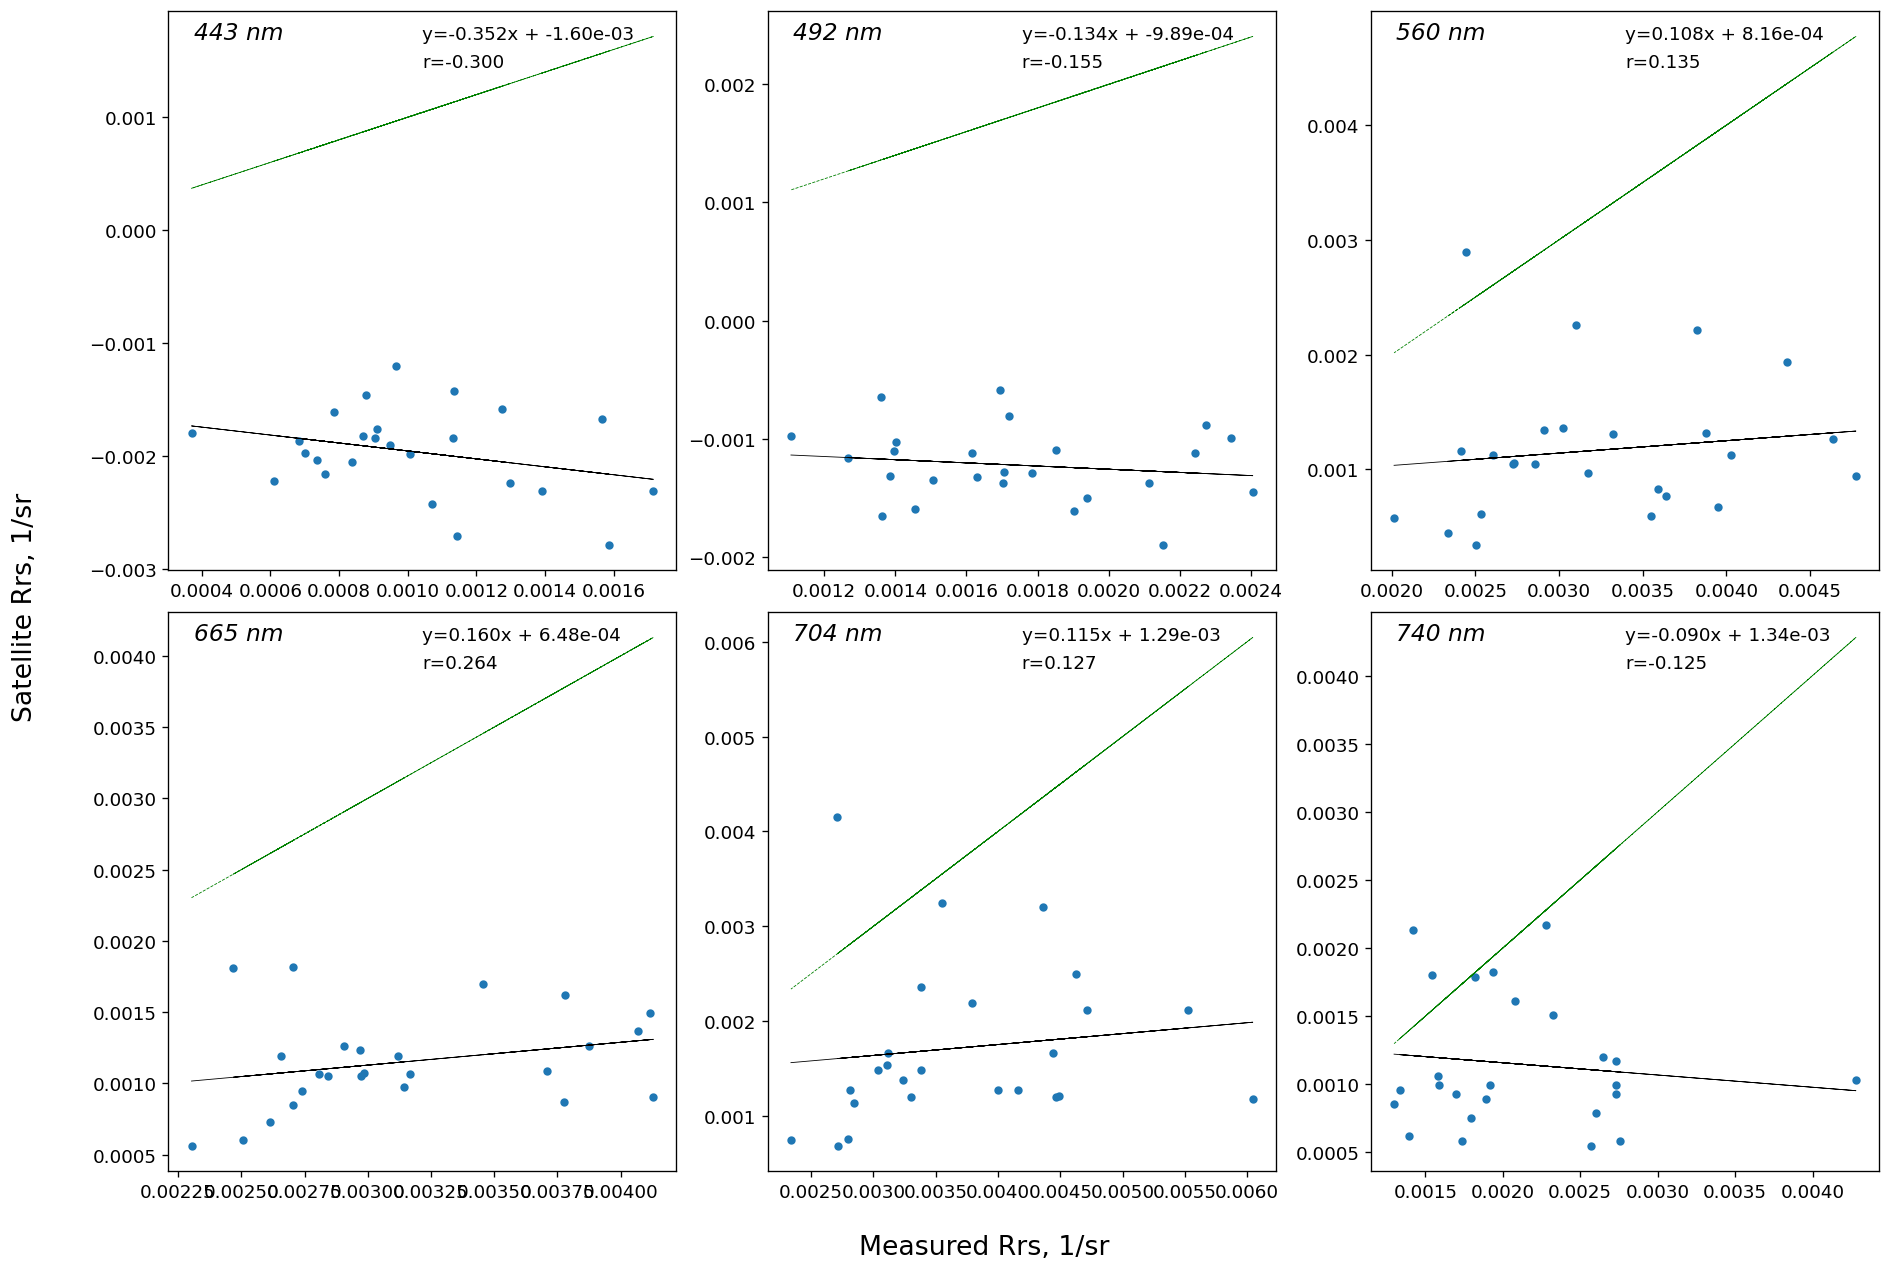

In [410]:
#calculate and plot in cycle for all bands
fig,axs = plt.subplots(figsize = (15,10), dpi=120, ncols=3, nrows=2, constrained_layout=True)


#fig.add_subplot(111, frame_on=False)
#plt.tick_params(labelcolor="none", bottom=False, left=False)
#plt.ylabel("Satellite Rrs")
#plt.xlabel("Measured Rrs, sr^-1")
res = []
for col, ax in zip(wavelength, axs.flatten()):
    x = combo[col]
    y = combo[f'Rrs({col})']
    lin_reg = np.polyfit(x, y, 1)
    pearson = np.corrcoef(x, y)[0,1]
    trend = np.polyval(lin_reg, x)
    bias = (y - x).sum() / x.size
    mape = (np.fabs(y - x)/x).sum() / x.size * 100
    rmse = (((y - x)**2).sum() / x.size)**0.5
    #print("y={0:.3f}x + {1:.2e}  r2={2:.3f}  bias={3:.4f}   MAPE={4:.3f}   RMSE={5:.4f}".format((*lin_reg), pearson[0,1]**2, bias, mape, rmse))
    #print("{0:.3f},{1:.2e},{2:.3f},{3:.4f},{4:.3f},{5:.4f}".format((*lin_reg), pearson**2, bias, mape, rmse))
    ax.plot(x, y, 'o', x, trend,  '-k', lw=0.5, ms=4) 
    ax.plot(x, x, '--g', lw=0.5)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 11)
    ax.text(0.05, 0.95, f"{col} nm", transform=ax.transAxes, fontsize=14, fontstyle='italic')
    ax.text(0.5, 0.95, "y={0:.3f}x + {1:.2e}".format(*lin_reg), transform=ax.transAxes, fontsize=11)
    ax.text(0.5, 0.9, "r={:.3f}".format(pearson), transform=ax.transAxes, fontsize=11)
    
    res.append([round(lin_reg[0], 4), round(lin_reg[1], 4), round(pearson, 3), round(rmse, 4), round(bias, 4)])
    print(f'lambda = {col}, slope = {round(lin_reg[0], 4)}, intercept = {round(lin_reg[1], 4)}, r = {round(pearson, 3)}, \
rmse = {round(rmse, 4)}, bias = {round(bias, 4)}')
    print()
    
fig.text(0.5, -0.04, 'Measured Rrs, 1/sr', ha='center', fontsize=16)
fig.text(-0.04, 0.5, 'Satellite Rrs, 1/sr', va='center', rotation='vertical', fontsize=16)


plt.savefig(f'scatterplots_{software}_{date_sat}.png')
plt.show()
print()

In [411]:
# print and save table with accuracy parameters in file
df1 = pd.DataFrame(res, index=wavelength, columns=['slope', 'intercept', 'r', 'rmse', 'bias']).T
fname = f'accuracy_{software}_{date_sat}.csv'
df1.to_csv(fname, sep='\t')
df1

,443,492,560,665,704,740
slope,-0.3516,-0.1345,0.1082,0.1603,0.1149,-0.0899
intercept,-0.0016,-0.0010,0.0008,0.0006,0.0013,0.0013
r,-0.3000,-0.1550,0.1350,0.2640,0.1270,-0.1250
rmse,0.0030,0.0030,0.0023,0.0021,0.0023,0.0013
bias,-0.0030,-0.0030,-0.0021,-0.0020,-0.0020,-0.0010


In [412]:
'''for col in data.columns:
    plt.figure();
    data[col].plot()
    new_data[int(col)].plot()
    sat_data[int(col)].plot()
    plt.annotate(f'Station #{col}', (0.05,0.85),
         xycoords='axes fraction',fontsize=10,style='italic',color='0.3')
    plt.xlabel('Wavelength, (nm)')
    plt.ylabel('Rrs, (1/sr)')
    plt.savefig(f'L2W_{date2}_St{col}.svg')'''

"for col in data.columns:\n    plt.figure();\n    data[col].plot()\n    new_data[int(col)].plot()\n    sat_data[int(col)].plot()\n    plt.annotate(f'Station #{col}', (0.05,0.85),\n         xycoords='axes fraction',fontsize=10,style='italic',color='0.3')\n    plt.xlabel('Wavelength, (nm)')\n    plt.ylabel('Rrs, (1/sr)')\n    plt.savefig(f'L2W_{date2}_St{col}.svg')"